In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model HM_BD_F_PNT begin
    @parameter begin
        M_Fr_body = 44.01
        g = 9.8
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "HM_BD_F_PNT")
end

HM_BD_F_PNT (generic function with 1 method)

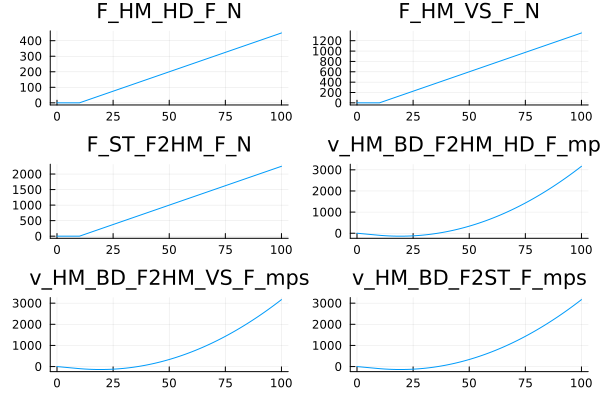

In [3]:
@model testblock begin
    @block begin
        b = HM_BD_F_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        ramp3 = Ramp(starttime=10, slope=25)
    end
    @connect begin
        ramp1.out => b.F_HM_HD_F_N
        ramp2.out => b.F_HM_VS_F_N
        ramp3.out => b.F_ST_F2HM_F_N
    end
    @scope begin
        b.F_HM_HD_F_N => F_HM_HD_F_N
        b.F_HM_VS_F_N => F_HM_VS_F_N
        b.F_ST_F2HM_F_N => F_ST_F2HM_F_N
        b.v_HM_BD_F2HM_HD_F_mps => v_HM_BD_F2HM_HD_F_mps
        b.v_HM_BD_F2HM_VS_F_mps => v_HM_BD_F2HM_VS_F_mps
        b.v_HM_BD_F2ST_F_mps => v_HM_BD_F2ST_F_mps
    end
end

m = @compile testblock()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(3,2))

In [4]:
@model HM_HD_F_PNT begin
    @parameter begin
        M_Fr_head = 27.6
        r_Fr_head = 0.21857
        theta_Fr_head = 1.3251
        k_Fr_head = 1210
        d_Fr_head = 8.17
        I_Fr_head = 1.8
        x_k_Fr_head_ini = -0.011885
        g = 9.8
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "HM_HD_F_PNT")
end

HM_HD_F_PNT (generic function with 1 method)

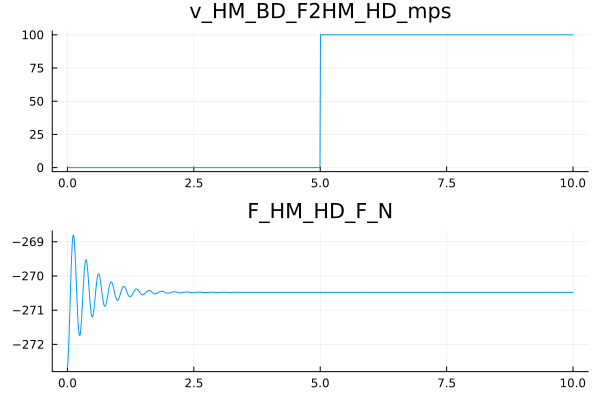

In [5]:
@model testblock begin
    @block begin
        m = HM_HD_F_PNT()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_HM_BD_F2HM_HD_mps
    end
    @scope begin
        m.v_HM_BD_F2HM_HD_mps => v_HM_BD_F2HM_HD_mps
        m.F_HM_HD_F_N => F_HM_HD_F_N
    end
end

m = @compile_derivative testblock()
res = simulate(m, tspan=[0, 10])
plot(res)

In [6]:
@model HM_VS_F_PNT begin
    @parameter begin
        kz_Fr_body_organs = 82200
        dz_Fr_body_organs = 195
        M_Fr_body_organs = 12.8
        g = 9.8
        z_kz_Fr_body_organs_ini = 0.001526
    end
    @xmlmodel("../METI_Vertical_Vibration.drawio", "HM_VS_F_PNT")
end

HM_VS_F_PNT (generic function with 1 method)

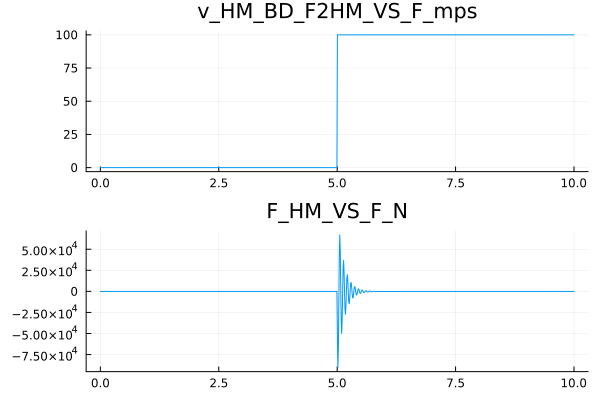

In [7]:
@model testblock begin
    @block begin
        m = HM_VS_F_PNT()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_HM_BD_F2HM_VS_F_mps
    end
    @scope begin
        m.v_HM_BD_F2HM_VS_F_mps => v_HM_BD_F2HM_VS_F_mps
        m.F_HM_VS_F_N => F_HM_VS_F_N
    end
end

m = @compile testblock() 
res = simulate(m, tspan=[0, 10])
plot(res)

In [8]:
@buildxml "models.xml" HM_HD_F_PNT HM_VS_F_PNT HM_BD_F_PNT

6708

In [9]:
@model HM_F_PNT begin
    @xmlmodel("../METI_Vertical_Vibration.drawio", "HM_F_PNT")
end

HM_F_PNT (generic function with 1 method)

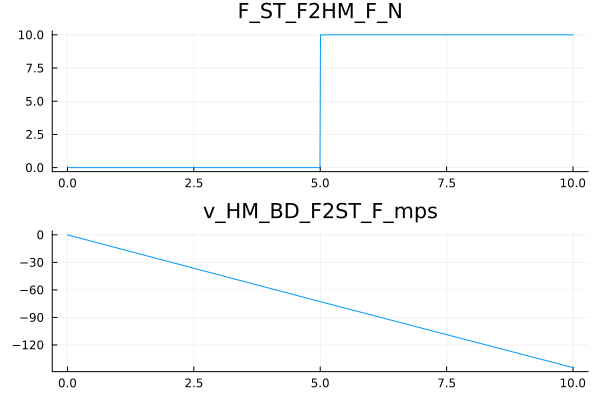

In [12]:
@model testblock begin
    @block begin
        m = HM_F_PNT()
        s1 = Step(steptime=5, finalvalue=10)
    end
    @connect begin
        s1.out => m.F_ST_F2HM_F_N
    end
    @scope begin
        m.F_ST_F2HM_F_N => F_ST_F2HM_F_N
        m.v_HM_BD_F2ST_F_mps => v_HM_BD_F2ST_F_mps
    end
end

m = @compile_derivative testblock()
res = simulate(m, tspan=[0, 10])
plot(res)